# **Partisi Data**

Data yang kita punya kudu dipartisi atau dibagi-bagi jadi train data dan test data. Biasanya ukurannya 8:2 buat train vs test datanya. Di tutorial ini kita bakal tau 2 jenis pembagian data yaitu:

1. Train Test Split
2. K-fold





## **Train Test Data**

Yang akan kita lakukan adalah ngebagi kesemua 150 data jadi 2 bagian, data training dan data testing. Perbandingannya bakal otomatis 80:20 persen. Well sebenernya ga pas-pas banget sih.. tapi ya sekitaran itu. Jadi bakal ada x buat training dan testing, begitu juga dengan ‘y’ bakal ada y buat training dan testing. BTW testing itu digunain buat prediksi.

In [1]:
# disini aku bakal import datanya dari sklearn
from sklearn.datasets import load_iris
iris=load_iris()   #datanya di load dulu!
x=iris.data    #fitur data, di print aja kalo mau lihat
y=iris.target   #label data, di print aja kalo mau lihat

In [2]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn=KNeighborsClassifier(n_neighbors=1) #define K=1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)
print(x_train.shape) #buat tau bentuknya x_train (112 baris dan 4 kolom)
print(x_test.shape)  #buat tau bentuknya x_test (38 baris dan 4 kolom)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)  #hasil prediksi 
print(y_test)  #jawaban yang sebenarnya
print(metrics.accuracy_score(y_test, y_pred))  #score prediksi

(112, 4)
(38, 4)
[1 2 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 2 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]
[1 2 2 0 2 1 0 1 0 1 1 2 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2 0 1 1 0 1 0 0
 2]
0.9210526315789473


Jadi x_train ada 112 data (80-an%) dan x_test ada 38 data (20-an%).
Terus kita mulai training x_train dan y_train. terus x_test nya di prediksi dan dimasukan ke variabel ‘y_pred’ yang bakal jadi array yang berisi hasil klasifikasi dari ke-38 data dari x_test.

Finally, kita lihat akurasi dari prediksi tadi. Pas ini kita bandingin y_test dan y_pred, karena y_test itu adalah hasil yang seharusya. jadi akurasi disini ngitung sejauh mana sih si ‘y_pred’ ini memenuhi jawaban yang sesungguhnya, yaitu ‘y_test’?

## **K-Fold Cross Validation**

K-fold adalah salah satu metode Cross Validation yang populer dengan melipat data sebanyak K dan mengulangi (men-iterasi) experimennya sebanyak K juga.

Misal nih, data kita ada 150. Ibarat kita pake K=5, berarti kita bagi 150 data menjadi 5 lipatan, isinya masing-masing 30 data. Eits, jangan lupa, kita perlu menentukan mana yang training data dan mana yang test data. Karena perbandingannya 80:20, berarti 120 data adalah training data dan 30 sisanya adalah test data. Berdasarkan ke-5 lipatan tadi, berarti bakal ada 4 lipatan (kita ganti aja ya nyebutnya jadi partisi ajah) x 30 data = 120 training data. Dan sisanya ada 1 partisi test data berisi 30 data.

Kemudian, experimen menggunakan data yang udah di partisi-partisi bakal diulang 5 kali (K=5). Tapi posisi partisi Test data berbeda ditiap iterasinya. Misal di iterasi pertama Test nya di posisi partisi awal, terus iterasi partisi kedua Test-nya di posisi kedua, dan seterusnya, pokonya gaboleh sama. Berikut nih gambarannya biar lebih ‘ngeh’.

![kfolds01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/kfolds01.png)


Serupa dengan teknik evaluasi training dan testing, pada K-fold cross validation data akan dibagi menjadi dua bagian: training dan testing; atau tiga bagian: training, validation, dan testing. Akan tetapi, pada teknik K-fold cross validation proses pembagian training dan testing akan dilakukan sebanyak K.

Contoh:
Jika kita memiliki data mengenai jenis tumbuhan tropis pada suatu wilayah, dimana pada data tersebut tedapat 3 jenis tumbuhan: bakau(30 data), mahoni (30 data), dan jati (40 data). Total data adalah 100. jika kita melakukan 5-fold cross validation. Dimana untuk setiap fold, data akan dibagi dengan proposi 80:20. Maka,

* Fold pertama data training: bakau (24 data), mahoni (24 data), dan jati (32 data); data testing: bakau (6 data), mahoni (6 data) dan jati (8 data).

* Fold pertama data training: bakau (24 data), mahoni (24 data), dan jati (32 data); data testing: bakau (6 data), mahoni (6 data) dan jati (8 data). Dimana data training adalah bagian dari data training + data testing dari fold pertama. Sedangkan data testing adalah bagian dari data training fold pertama.
dan seterusnya

![kfolds02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/kfolds02.png)

Pada teknik k-fold cross validation hasil validasi memiliki tingkat bias yang lebih rendah, dikarenakan algoritma ML dievaluasi pada kasus yang berbeda-beda. Namun untuk jumlah data yang cukup besar teknik ini tidak efisien dikarenakan akan memakan waktu yang cukup lama.

In [4]:
# disini aku bakal import datanya dari sklearn
from sklearn.datasets import load_iris
iris=load_iris()   #datanya di load dulu!
x=iris.data    #fitur data, di print aja kalo mau lihat
y=iris.target   #label data, di print aja kalo mau lihat

In [5]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=False)
print(kf)  #buat tau Kfold dan parameter defaultnya
i=1        #ini gapenting, cuma buat nandain fold nya.
for train_index, test_index in kf.split(x):
    print("Fold ", i)
    print("TRAIN :", train_index, "TEST :", test_index)
    x_train=x[train_index]
    x_test=x[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    i+=1
print("shape x_train :", x_train.shape)
print("shape x_test :", x_test.shape)

KFold(n_splits=5, random_state=None, shuffle=False)
Fold  1
TRAIN : [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold  2
TRAIN : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110

Naah jadi teman2, apakah yang terjadi disini??

Jadi inget, kita punya 150 data dan bakal dibagi 2, train dan test. Jadi kita bayangin 1 fold dulu deh, Fold yang paling pertama. Disana ada 120 train data dan 30 test data. Terus kalo kamu run code diatas, yang di print disitu bakal indeks datanya. Inget, indeks doang ya.
Jadi bayangin aja misal di fold pertama itu ada angka 30. Artinya x[30] (x indeks ke 30) yang berisi 4 kolom data petal dan sepal. begitu deh seterusnya..

Kenapa ini harus dilakukan? supaya proses training nya lebih akurat sehingga prediksinya nanti lebih mantap.

Contoh lainnya :

Implementasi training dan testing validation

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 
#N = jumlah data
N = 100
 
#X = features
#generate random data dengan dimensi (N, 5)
X = np.random.rand(N, 5)
#y = labels (0 = bakau, 1 = mahoni, 2 = jati)
#generate data dengan nilai 0, 1, dan 2 dengan proposi 30%, 30%, 40%
y = np.zeros(N)
y[0:30] = 0
y[30: 60] = 1
y[60: 100] = 2
 
#split data dengan proposi training = 60% dan testing = 40
 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, stratify=y)


Implementasi K-fold cross validation dengan nilai K = 5

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
 
#N = jumlah data
N = 100
 
#X = features
#generate random data dengan dimensi (N, 5)
X = np.random.rand(N, 5)
#y = labels (0 = bakau, 1 = mahoni, 2 = jati)
#generate data dengan nilai 0, 1, dan 2 dengan proposi 30%, 30%, 40%
y = np.zeros(N)
y[0:30] = 0
y[30: 60] = 1
y[60: 100] = 2
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
 
for trainingIndex, testingIndex in sss.split(X, y):
    X_train = X[trainingIndex, :]
    y_train = y[trainingIndex]
 
    X_test = X[testingIndex, :]
    y_test = y[testingIndex]

# **Cara memvalidasi performa model (Measuring Model Performance)**

In [8]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# import class object
from sklearn.neighbors import KNeighborsClassifier
# membuat objek model dan memilih hyperparameter
model_knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
# memisahkan data feature dan data target
x = df.drop('species', axis=1)
y = df['species']
# memerintahkan model untuk empelajari data dengan menggunakan method .fit()
model_knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

## **Cara salah dalam Mengevaluasi Model**

In [10]:
y_pred = model_knn.predict(x)

In [11]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y, y_pred)
score

1.0

Nilai akurasinya bagus, langung serahkan.
Padahal belum tentu bagus. Salahnya ada pada, predict.

`y_pred = model_knn.predict(x_train)`

karena yang di prediksi juga berasal dari hasil fitting 

`model_knn.fit(x_train, y_train)`

## **Cara benar dalam Mengevaluasi Model**

data dibagi dengan `train_test_split`

`x` -> `x_train, x_test` -> 0.3 - 0.2 (porsi test)

`y` -> `y_train, y_test` -> 0.3 - 0.2 (porsi test)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21, stratify=y) 
# train_size otomatis terset 0.8 ketika test_size ditentukan nilainya begitupun sebaliknya

In [13]:
# stratify=y akan memiliki nilai label yang sama
y_train.value_counts()

0.0    40
2.0    40
1.0    40
Name: species, dtype: int64

In [14]:
y_test.value_counts()

2.0    10
0.0    10
1.0    10
Name: species, dtype: int64

In [15]:
# Hasil Pembagian dalam di cek dengan shape
print(x.shape)
print(x_train.shape) # 0.8
print(x_test.shape) # 0.2

(150, 4)
(120, 4)
(30, 4)


In [16]:
# import class object
from sklearn.neighbors import KNeighborsClassifier
# membuat objek model dan memilih hyperparameter
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [17]:
y_pred = model_knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9333333333333333

## **Validasi Model dengan Teknik Cross-Validation**

Masih ada kekurangan, bahwa hasil dari akurasi score tergantung dari fungsi `train_test_split` mensplit data kita. pada `random_state` diubah akan mengubah `accuracy_score`. Kurang Valid. Solusi ada suatu metode yang disebut `Cross-Validation (K-Fold CV).

[source 1](http://ethen8181.github.io/machine-learning/model_selection/model_selection.html#K-Fold-Cross-Validation)

[source 2](https://medium.com/@piyut.dyoni/machine-learning-buat-yang-ngerasa-bodo-e37bc5b26d9d)

![kfolds03.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/kfolds03.png)





In [19]:
# from sklearn.model_selection import cross_val_score
# knn= KNeighborsClassifier(n_neighbors=5)
# score= cross_val_score(knn, x, y, cv=10, scoring='accuracy') 
# print(score)        
# print(score.mean())

Disini kita coba implementasi cross_validation yang sesungguhnya. ada 5 parameter di cross_val_score. lo bisa liat lebih detail di dokumentasinya sklearn. Yang jelas ‘cv’=cross validation alias jumlah fold nya.

Ketika score di print bakal ketauan akurasi tiap iterasi. Kalo kita rata-rata-in, maka scorenya 96%. Sebenernya yang kita code disini lebih praktis dari partisi-partisian tadi. I mean, cross_val_score udah nyedian fungsi partisian sendiri jadi kita gausah pusing kudu ngebagi-bagi data.

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [21]:
# import class object
from sklearn.neighbors import KNeighborsClassifier
# membuat objek model dan memilih hyperparameter
model_knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
# memisahkan data feature dan data target
x = df.drop('species', axis=1)
y = df['species']
# memerintahkan model untuk empelajari data dengan menggunakan method .fit()
model_knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=2)
score= cross_val_score(model_knn, x, y, cv=10, scoring='accuracy') 
print(score) # hasil performance setiap iterasi
print(score.mean()) # hasil rata2

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.86666667 0.93333333 1.         1.        ]
0.9533333333333334


## **Tuning Parameter (Hyperparameter)**

In [23]:
k_range = range(1,31)  #1-30
k_score = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_score.append(score.mean())
print(k_score)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Kalo ngomongin klasifikasi itu bawaannya seberapa akurat sih klasifikasi data kita? nah di KNN ni punya beberapa parameter yang menentukan tinggi rendahnya akurasi klasifikasi kita. Yaitu jumlah K pada KNN. Kita harus nyobain nih kira2 K=berapa sih yang menghasilkan akurasi paling tinggi? Proses kaya gini nih, nyari parameter yang akurasinya tinggi, namanya **Tuning Parameter** atau biasanya dibilang juga **Finding Hyperparameter.**

Disini kita coba **1–30 K**. Ntar bakal keliatan K mana yang akurasinya paling jitu.

Semua score pada K yang berbeda2 disimpan di variable k_score. Nah kalo kamu run, hasilnya array yang banyak itu adalah ke 30 score dari K 1–30.

plot aja itu scorenya..

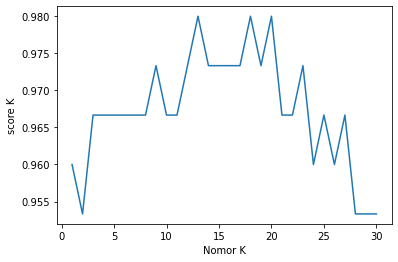

In [24]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_score)
plt.xlabel('Nomor K')
plt.ylabel('score K')
plt.show()

Jadi kedua linechart ini menggambarkan kalo K yang menghasilkan score tertinggi adalah 13, 18, dan 20. Tapi karena batas tertinggi ada di 20, soalnya abis itu scorenya cenderung turun, maka kita ambil pinalty bahwa 20 adalah K yang paling mentok dan menghasilkan score tinggi. Soo… mari kita buktikan apakah 20 adalah jawaban yang benar.

In [25]:
knn=KNeighborsClassifier(n_neighbors=20)
score=cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean()
print(score) #well, hasilnya 98% ^^

0.9800000000000001


## **Metrics Accuracy**

Metrics adalah suatu fungsi untuk menghitung performance dari model kita.

Accuracy : tebakan betul / jumlah semua data

Macam - Macam Matriks :
    
1. Confusion Matriks
2. AUC
3. Log-Loss , dll

**kekurangan accuracy_score**

misalkan : 1000 orang 

-> kanker 1%

-> tidak kanker 99%

kasus class imbalance. karena label antara dua kelas jauh berbeda.

Accuracy : 
1000 -> 990 TK, 10K

banyak tebakan tidak kanker 1000 TK

Accuracy : tebakan betul / jumlah semua 

data -> 990/1000 = 99% akurasinya bagus. 

Namun sebenarnya model algoritma salah besar karena tidak mungkin semua org tidak kena kanker dilihat dri data aslinya.







### **Confusing Matriks**

[source](https://medium.com/@ksnugroho/confusion-matrix-untuk-evaluasi-model-pada-unsupervised-machine-learning-bc4b1ae9ae3f)

[source 2](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

[source 3](https://medium.com/@rey1024/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8)

[source 4](https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124)

Ketika berhadapan dengan permasalahan machine learning timbul banyak pertanyaan “bagaimana cara mendapatkan model yang paling baik?”. Oleh karena itu, mengukur kinerja suatu model yang telah kita buat merupakan langkah penting dalam machine learning sehingga dapat menjadi pertimbangan untuk memilih model “terbaik”. Salah satu teknik yang dapat digunakan untuk mengukur kinerja suatu model khusunya kasus klasifikasi (supervised learning) pada machine learning adalah confusion matrix.

## **Apa itu confusion matrix dan mengapa kita memerlukan itu ?**

**Confusion matrix** juga sering disebut **Error Matrix**. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui. Gambar dibawah ini merupakan confusion matrix dengan 4 kombinasi nilai prediksi dan nilai aktual yang berbeda. Perhatikan gambar dibawah ini:

![confusingmatrix.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/confusingmatrix.jpeg)

contoh :

![ConfusionMatrix02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix02.png)


Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah 

* True Positive (TP)

* True Negative (TN)

* False Positive (FP)

* False Negative (FN)

Agar lebih mudah memahaminya, saya menggunakan contoh kasus sederhana untuk memprediksi seorang pasien menderita kanker atau tidak.

* True Positive (TP)

    Merupakan data positif yang diprediksi benar. Contohnya, pasien menderita kanker (class 1) dan dari model yang dibuat memprediksi pasien tersebut menderita kanker (class 1).

* True Negative (TN)

    Merupakan data negatif yang diprediksi benar. Contohnya, pasien tidak menderita kanker (class 2) dan dari model yang dibuat memprediksi pasien tersebut tidak menderita kanker (class 2).

* False Postive (FP) — Type I Error

    Merupakan data negatif namun diprediksi sebagai data positif. Contohnya, pasien tidak menderita kanker (class 2) tetapi dari model yang telah memprediksi pasien tersebut menderita kanker (class 1).
    
* False Negative (FN) — Type II Error

    Merupakan data positif namun diprediksi sebagai data negatif. Contohnya, pasien menderita kanker (class 1) tetapi dari model yang dibuat memprediksi pasien tersebut tidak menderita kanker (class 2).


Pada beberapa kasus “Type II Error” lebih berbahaya, kita dapat menghubungkan pernyataan itu dengan contoh prediksi kanker diatas. Jika pasien tidak menderita kanker tetapi diprediksi menderita kanker (FP), maka pada diagnosa selanjutnya pasien tersebut dapat mengetahui keadaan sebenarnya bahwa pasien tersebut benar tidak menderita kanker. Tetapi jika ada pasien yang sebenarnya menderita kanker tetapi diprediksi tidak menderita kanker (FN), maka pasien tersebut akan mengetahui keadaan sebenarnya dengan sangat terlambat dan pasien tersebut tidak segera mengambil tindakan pencegahan medis untuk kanker itu. Sehingga dapat menyebabkan kondisi pasien yang semakin memburuk setiap harinya bahkan kematian. Jadi dapat dikatakan bahwa “Type II Error” lebih berbahaya.

**Ada cara yang lebih mudah untuk mengingatnya, yaitu:**

* Jika diawali dengan True maka prediksinya adalah benar, entah diprediksi terjadi atau tidak terjadi.

* Jika diawali dengan False maka prediksinya adalah salah.

* Positif dan negatif merupakan hasil prediksi dari model.

Tentunya kita ingin model yang telah kita buat memberikan 0 false positive dan 0 false negative. Tetapi pada prakteknya hal tersebut tidak akan pernah terjadi karena model mana pun tidak akan memberikan keakuratan 100%. Jika model anda memberikan nilai 100% maka ada masalah pada model yang anda buat atau data yang anda gunakan.


## **Berikut adalah beberapa manfaat dari confusion matrix:**

Menunjukkan bagaimana model ketika membuat prediksi.
Tidak hanya memberi informasi tentang kesalahan yang dibuat oleh model tetapi juga jenis kesalahan yang dibuat.
Setiap kolom dari confusion matrix merepresentasikan instance dari kelas prediksi.
Setiap baris dari confusion matrix mewakili instance dari kelas aktual.

## **Contoh Implementasi**

Sebagai contoh, sebuah model akan dilatih untuk memprediksi apakah seorang pasien sedang menderita kanker atau tidak. Dengan asumsi terdapat 20 pasien dengan 9 pasien positif kanker dan 11 pasien negatif kanker, maka contoh confusion matrix yang dihasilkan model seperti dibawah ini :

![ConfusionMatrix03.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix03.png)

Jika dilihat dari confusion matrix diatas dari 9 pasien positif kanker, model memprediksi ada 3 pasien yang diprediksi negatif kanker (FN), dan dari 11 pasien negatif kanker, model memprediksi ada 2 pasien yang diprediksi positif kanker (FP). Prediksi yang benar terletak pada tabel diagonal (garis bawah merah), sehingga secara visual sangat mudah untuk melihat kesalahan prediksi karena kesalahan prediksi berada di luar tabel diagonal confusion matrix.

## **Bagaimana mengukur performance metrics dari confusion matrix ?**

Kita dapat menggunakan confusion matrix untuk menghitung berbagai performance metrics untuk mengukur kinerja model yang telah dibuat. Pada bagian ini mari kita pahami beberapa performance metrics populer yang umum dan sering digunakan: 

***accuracy, precission, dan recall***

### Accuracy

Accuracy menggambarkan seberapa akurat model dapat mengklasifikasikan dengan benar. Maka, accuracy merupakan rasio prediksi benar (positif dan negatif) dengan keseluruhan data. Dengan kata lain, accuracy merupakan tingkat kedekatan nilai prediksi dengan nilai aktual (sebenarnya). Nilai accuracy dapat diperoleh dengan persamaan (1).

![ConfusionMatrix04.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix04.jpeg)

![ConfusionMatrix05.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix05.png)

Akurasi = (TP + TN ) / (TP+FP+FN+TN)


Dari contoh confusion matrix klasifikasi biner diatas maka dengan menghitung nilai accuracy dapat menjawab pertanyaan “Berapa persen pasien yang benar diprediksi menderita kanker maupun yang tidak menderita kanker dari kesuluruhan pasien?”

![ConfusionMatrix06.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix06.jpeg)

### Precision (Positive Predictive Value)

Precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Maka, precision merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Dari semua kelas positif yang telah di prediksi dengan benar, berapa banyak data yang benar-benar positif. Nilai precision dapat diperoleh dengan persamaan (2).

![ConfusionMatrix07.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix07.jpeg)

![ConfusionMatrix08.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix08.jpeg)

Precission = (TP) / (TP+FP)


Dari contoh confusion matrix klasifikasi biner diatas maka dengan menghitung nilai precision dapat menjawab pertanyaan “Berapa persen pasien yang benar menderita kanker dari keseluruhan pasien yang diprediksi menderita kanker?”

![ConfusionMatrix09.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix09.jpeg)

### Recall atau Sensitivity (True Positive Rate)

Recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi. Maka, recall merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Nilai recall dapat diperoleh dengan persamaan (3).

![ConfusionMatrix10.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix10.jpeg)

![ConfusionMatrix11.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix11.jpeg)

Recall = (TP) / (TP + FN)

Dari contoh confusion matrix klasifikasi biner diatas maka dengan menghitung nilai recall dapat menjawab pertanyaan “Berapa persen pasien yang diprediksi kanker dibandingkan keseluruhan pasien yang sebenarnya menderita kanker”.

![ConfusionMatrix12.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/ConfusionMatrix12.jpeg)

### Specificity
Merupakan kebenaran memprediksi negatif dibandingkan dengan keseluruhan data negatif. Specificity menjawab pertanyaan “Berapa persen pasien yang benar diprediksi tidak kanker dibandingkan dengan keseluruhan pasien yang sebenarnya tidak kanker”.

Specificity = (TN)/ (TN + FP)

### F1 Score

F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan

F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

dalam kasus di atas, F1 Score = 2* (80%*67%) / ( 80% + 67%) = 72,93%

## **Pemilihan acuan performansi algoritma**

Nah, jika kita membandingkan beberapa algoritma ML yang berbeda dengan accuracy, precission, recall dan specificity yang berbeda-beda, algoritma mana yang kita pilih? Apa yang digunakan acuan?

* **Pilih algoritma yang memiliki Accuracy tinggi jika**

    Akurasi sangat bagus kita gunakan sebagai acuan performansi algoritma JIKA dataset kita memiliki jumlah data False Negatif dan False Positif yang sangat mendekati (Symmetric). Namun jika jumlahnya tidak mendekati, maka sebaiknya gunakan F1 Score sebagai acuan.

    Pada contoh di atas, nilai FP dan FN mendekati, maka accuracy bisa digunakan sebagai acuan ukuran performansi tersebut.

* **Pilih algoritma yang memiliki Recall tinggi jika**

    kita lebih memilih False Positif lebih baik terjadi daripada False Negatif.
    Dalam contoh di atas, maka kita mempertimbangkan Recall karena lebih baik algoritma kita memprediksi mahasiswa positif DO tetapi sebenarnya tidak DO daripada algoritma salah memprediksi bahwa mahasiwa diprediksi tidak DO padahal sebenarnya dia DO.

* **Pilih algoritma yang memiliki Precission tinggi jika**

    kita lebih menginginkan terjadinya True Positif dan sangat tidak menginginkan terjadinya False Positif. Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Kita lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk kita)

* **Pilih algoritma yang memiliki Specificity tinggi jika**

    kita tidak menginginkan terjadinya false positif. Contohnya pada prediksi apakah seseorang kecanduan narkoba atau tidak maka kita sangat mengharapkan tidak terjadi salah mendeteksi orang yang sebenarnya negatif tapi dinyatakan positif. Kasihan dia masuk penjara padahal tidak kecanduan narkoba :-)







[source](https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html)

Catatan :

Khusu untuk

`from sklearn.metrics import confusion_matrix`

`confusion_matrix(y_test, y_pred)`

Ascending (default) -> 0 1 negatif positif ke kanan dan kebawah 

bentuknya :

(tn, fp, fn, tp)

TN FP

FN TP

`confusion_matrix(y_test, y_pred, labels=[1, 0])`

dibalik -> 1 0 positif negatif ke kanan dan kebawah

bentuknya :

(tp, fn, fp, tn)

TP FN

FP TN

bentuknya seperti ini :

![confusionMatrxiUpdated.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/confusionMatrxiUpdated.jpg)

 **Contoh 1**

In [26]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [27]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [28]:
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]])

In [29]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

 **Contoh 2**

[source csv](https://www.kaggle.com/kumargh/pimaindiansdiabetescsv)


**About this file**

This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [30]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = df.drop('class', axis=1)
Xs = scale(X)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=21, stratify=y)

model_lr = LogisticRegression(random_state=21)
params_grid = {
    'C':np.arange(0.1, 1, 0.1), 'class_weight':[{0:x, 1:1-x} for x in np.arange(0.1, 0.9, 0.1)]
}

gscv = GridSearchCV(model_lr, params_grid, cv=10, scoring='f1')
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=21, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'class_weight': [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8},
                                          {0: 0.30000000000000004, 1: 0.7},
                                          {0: 0.4, 1: 0.6}, {0: 0.5, 1: 0.5},
                                     

In [33]:
y_pred = gscv.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[75, 25],
       [15, 39]])

Ascending (default) -> 0 1 negatif positif ke kanan dan kebawah 

In [35]:
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[39, 15],
       [25, 75]])

dibalik -> 1 0 positif negatif ke kanan dan kebawah

bentuknya :

TP FN

FP TN

In [36]:
TP = 39
FN = 15
FP = 25
TN = 75

![confusionMatrxiUpdated.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/confusionMatrxiUpdated.jpg)

F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

In [37]:
classification_report?

In [38]:
print(classification_report(y_test, y_pred, labels= [1, 0]))

              precision    recall  f1-score   support

           1       0.61      0.72      0.66        54
           0       0.83      0.75      0.79       100

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



In [39]:
# menghitung nilai precision, recall, f1-score dari model kita dalam memprediksi data yang positive
precision = TP/(TP+FP)
print('precision = ', precision)

recall = TP/(TP+FN)
print('recall = ', recall)

f1_score = 2 * (recall*precision)/(recall + precision)
print('f1 score = ', f1_score)

precision =  0.609375
recall =  0.7222222222222222
f1 score =  0.6610169491525424


In [40]:
# menghitung nilai precision_negative, specifity, f1-score dari model kita dalam memprediksi data yang positive
precision_negative = TN/(TN+FN)
print('precision_negative = ', precision_negative)

specifity = TN/(TN+FP) # recall negative
print('specifity = ', specifity)

f1_score = 2 * (specifity*precision_negative)/(specifity + precision_negative)
print('f1 score = ', f1_score)

precision_negative =  0.8333333333333334
specifity =  0.75
f1 score =  0.7894736842105262


 **Contoh 3**

Dataset yang Digunakan

In [41]:
import pandas as pd
import numpy as np
# membaca dataset 
# data = pd.read_csv("data/breast-cancer-wisconsin-data.csv")
data = pd.read_csv('https://drive.google.com/uc?id=1EwFuq_2VFBF2NAeEG2HqwXZKmJWNRU-_') 

# mengahapus kolom yang tidak digunakan
data.drop(["Unnamed: 32","id"], axis=1, inplace=True)
# merubah label M(ganas) = 1 dan B(jinak) = 0
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
data.head(3) # menampilkan sample data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [42]:
x = data.drop('diagnosis', axis=1)
y = data.diagnosis

Membagi Dataset dan Membuat Model Prediksi

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Selanjutnya, kita akan membuat model sederhana menggunakan Decision Tree untuk melakukan prediksi.

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test) # prediksi

Evaluasi Model menggunakan Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[81,  8],
       [ 3, 51]])

Kita dapat memvisualisasikan confusion matrix tersebut untuk memudahkan dalam mengevaluasi.

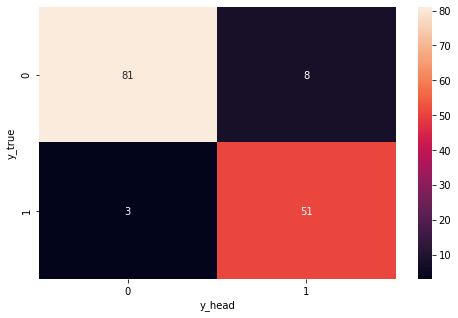

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

performance metrics seperti: accuracy, recall, dan precision.

In [47]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        89
           1       0.86      0.94      0.90        54

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



### **ROC and AUC**

[source 1](https://medium.com/@arifinrio95/memahami-roc-dan-auc-2e0e4f3638bf)

[source 2](https://www.rezafaisal.net/?p=3068)

### **Receiver Operating Characteristic / ROC**

Kurva ROC dibuat berdasarkan nilai telah didapatkan pada perhitungan dengan confusion matrix, yaitu antara **False Positive Rate** dengan **True Positive Rate**. Dimana:

* False Positive Rate (FPR) = False Positive / (False Positive + True Negative)

* True Positive Rate (TPR) = True Positive / (True Positive + False Negative)

ROC (Receiver Operating Characteristics) adalah semacam alat ukur performance untuk classification problem dalam menentukan threshold dari suatu model. Contohnya: pada logistic regression, default dari thresholdnya adalah 0.5. Apakah 0.5 ini threshold terbaik? Well, ya kalo distribusi peluangnya seperti ini:

![roc01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc01.png)

Atau gini juga sih

![roc02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc02.png)

Aku ambil contoh dari video, tentang peluang obesitas seekor tikus (kenapa tikus mulu ya).
Masuk akal jika semakin berat seekor tikus, maka semakin tinggi peluang dia obesitas. Karena kita bicara peluang, artinya ada juga tikus yang berat banget tapi ngga obesitas, mungkin dia tikus gym, badannya otot semua. Kalo diplot peluangnya, dan ditambah garis regresi logistic jadinya kaya gini:

![roc03.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc03.png)

Yang biru adalah tikus yang obesitas, yang merah normal.

Kita lihat jika kita tentukan thresholdnya sebesar 0.5 maka untuk sampel tersebut kita punya 3 True Positive, 1 False Positive, 3 True Negative, dan 1 False Negative.

![roc04.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc04.png)

Coba kita ambil threshold yang lain ya, let us say 0.9…

Maka confusion matrixnya jadi gini,

![roc05.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc05.png)

Dengan threshold ini, kita dapat hasil yang lebih baik.
Threshold ini dapat kita set dimana saja, dan kita cari semua kemungkinannya. Trus gimana kita nentuin threshold mana yang paling baik? Inilah gunanya ROC.
Daripada kita mabok karna confusion matrix, mending kita m̶a̶b̶o̶k̶ ̶p̶e̶r̶t̶a̶l̶i̶t̶e̶ plot smua kemungkinan thresholdnya dalam ROC graph,

![roc06.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc06.png)

Sumbu y merepresentasikan True Positive Rate, sumbu x merepresentasikan False Positive Rate. Dimana,

TPR/Recall/Sensitivity = TP/TP+FN

![roc07.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc07.png)

Specifity = TN/TN+FP

![roc08.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc08.png)

FPR = 1 - Specifity = FP/TN+FP

![roc09.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc09.png)

Titik-titik di ROC graph itu menggambarkan semua kemungkinan TP dan FP jika kita jalankan thresholdnya dari bawah sampe atas.

Mulai dari threshold paling bawah yaitu 0, dengan kata lain kita klasifikasikan semua tikus adalah obesitas, confusion matrixnya jadi gini nih:

![roc10.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc10.png)

TP dan FP kemudian diplot ke graph jadinya gini:

![roc11.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc11.png)

Titik (1,1) artinya model kita berhasil memprediksi semua tikus yang aktualnya obesitas diprediksi sebagai obesitas, namun juga gagal memprediksi semuja tikus yang aktualnya tidak obesitas, karna semuanya dipetakan menjadi obesitas.

Kalo kita petakan semua threshold dari sampel kita, kita akan dapat ROC graph seperti ini:

![roc12.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc12.png)

Catat bahwa semakin tinggi True Positive Rate dan semakin kecil False Positive Rate maka thresholdnya semakin bagus. Kaya gini:

![roc13.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/roc13.png)

### **AUC (Area Under the Curve)**

AUC membuat kita mudah dalam membandingkan model satu dengan yang lainnya. AUC adalah luas area di bawah curve ROC, atau integral dari fungsi ROC (?).

ROC graph dari sampel kita dengan model logistic regression memiliki AUC = 0.9

![auc01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc01.png)

Misalkan kita petakan ROC dengan model random forest maka grafiknya akan jadi seperti berikut:

![auc02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc02.png)

Dan kita harus memilih model yang AUCnya paling besar, karena untuk setiap titik dia memiliki TP lebih tinggi dan atau FP lebih rendah.

.................................................................................................

confusion matrix hanya menyajikan informasi dalam bentuk angka.  Untuk kasus klasifikasi 2 class (binary classification), jika ingin menampilkan informasi kinerja algoritma klasifikasi dalam bentuk grafik maka dapat digunakan Receiver Operating Characteristic (ROC) atau Precision-Recall Curve.

**Receiver Operating Characteristic / ROC**

Kurva ROC dibuat berdasarkan nilai telah didapatkan pada perhitungan dengan confusion matrix, yaitu antara False Positive Rate dengan True Positive Rate. Dimana:

* False Positive Rate (FPR) = False Positive / (False Positive + True Negative)

* True Positive Rate (TPR) = True Positive / (True Positive + False Negative)
Dan berikut adalah contoh kurva ROC.


![auc03.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc03.jpg)


![auc04.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc04.png)


![auc05.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc05.png)


![auc06.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/auc06.png)

INTINYA UNTUK MEMBANDINGKAN DUA MODEL

[Source Code](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

ROC Curves and AUC in Python
We can plot a ROC curve for a model in Python using the roc_curve() scikit-learn function.

The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. The function returns the false positive rates for each threshold, true positive rates for each threshold and thresholds.

...
**calculate roc curve**
> fpr, tpr, thresholds = roc_curve(y, probs)
...

The AUC for the ROC can be calculated using the roc_auc_score() function.

Like the roc_curve() function, the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0 for no skill and perfect skill respectively.

**calculate AUC**

> auc = roc_auc_score(y, probs)

> print('AUC: %.3f' % auc)

A complete example of calculating the ROC curve and ROC AUC for a Logistic Regression model on a small test problem is listed below.



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


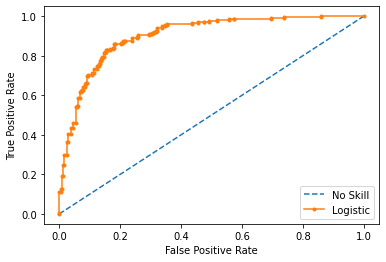

In [48]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# **Model Selection and Hyperparameter Tuning**

memilih model yang bagus dan membuat model yang bagus dengan men-tuning hyperparameter nya.


In [49]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X = df.drop('class', axis=1)
Xs = scale(X)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=21, stratify=y)

model_lr = LogisticRegression(random_state=21)
params_grid = {
    'C':np.arange(0.1, 1, 0.1), 'class_weight':[{0:x, 1:1-x} for x in np.arange(0.1, 0.9, 0.1)]
}

gscv = GridSearchCV(model_lr, params_grid, cv=10, scoring='f1')
gscv.fit(X_train, y_train);

Gunanya Train Score dan Test Score

In [51]:
y_pred_train = gscv.predict(X_train)
y_pred_test = gscv.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
print('Training Score : {}'.format(accuracy_score(y_train, y_pred_train)))
print('Test Score : {}'.format(accuracy_score(y_test, y_pred_test)))

Training Score : 0.750814332247557
Test Score : 0.7402597402597403


Training Score -> Untuk menilai seberapa baik si model belajar dari data training

Test Score -> Untuk menilai seberapa baik si model memprediksi data yang mereka belum buat

## **Model Selection**

### **Error**

hanya boleh memilih Error yang kecil.
Susah mendapatkan model yang 100% betul akurasinya

Error -> reducable -> error yang bisa diminimalisir errornya

Error -> irreducable -> tidak bisa diminimalisir errornya, selalu ada error

............

* Irreducible Error

    Errors that cannot be reduced no matter what algorithm you apply is called an irreducible error. It is usually caused by unknown variables that may be having an influence on the output variable.

* Reducible Error has two components — bias and variance.

    Presence of bias or variance causes overfitting or underfitting of data.

..........

### **Error Reducable**

* Bias

    Bias adalah perbedaan antara rata rata hasil prediksi dari model ML yang kita develop dengan data nilai yang sebenarnya. Bias yang tinggi dikarenakan dalam pembangunan model ML, dilakukan terlalu sederhana (oversimplified). Faktor penyebab lain dikarenakan model ML yang di develop terlalu tidak terlalu berinteraksi dengan training data.

    Bias adalah seberapa jauh nilai yang diprediksi dari nilai aktual. Jika nilai prediksi rata - rata jauh dari nilai aktual maka biasnya tinggi .
    
    Bias tinggi menyebabkan algoritma kehilangan hubungan yang relevan antara variabel input dan output. Ketika suatu model memiliki bias yang tinggi maka itu menyiratkan bahwa model itu terlalu sederhana dan tidak menangkap kompleksitas data sehingga kurang sesuai dengan data (underfitting the data) .

* Variance

    Variance adalah variabel dari prediksi model untuk data tertentu dimana memberikan kita informasi perserbaran data kita. Model yang memiliki variance tinggi sangat memperhatikan hanya pada train data. High variance model, perform baik di train data. Tetapi jika disuguhkan data baru yang belum pernah ditemukan di train data. Model tersebut tidak dapat mengeneralisasikan secara baik dari identifikasi data baru tersebut. Alhasil model memprediksi dengan keliru.

    Varians terjadi ketika model berkinerja baik pada dataset terlatih tetapi tidak bekerja dengan baik pada dataset yang tidak dilatih, seperti dataset pengujian atau dataset validasi. Variance memberi tahu kita bagaimana nilai yang diprediksi tersebar dari nilai aktual .

    Varians tinggi menyebabkan (overfitting) yang menyiratkan bahwa model algoritma noise acak hadir dalam data pelatihan .

    ketika model memiliki varian yang tinggi maka model menjadi sangat fleksibel dan menyesuaikan diri dengan titik data dari set pelatihan. ketika model varians tinggi menemukan titik data berbeda yang belum dipelajari maka tidak dapat membuat prediksi yang benar.

![biasvar01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvar01.png)

![biasvar02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvar02.png)

![biasvar03.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvar03.png)

![biasvar04.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvar04.png)

![biasvar05.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvar05.png)


Data yang memiliki Bias yang tinggi dengan variance yang rendah akan menjadi underfitting. Sementara jika dengan bias tinggi dan juga high variance menjadikan prediksi sangat tidak tepat. Jika biasnya rendah dan variancenya tinggi akan menimbulkan overfitting dimana dengan data train, perform baik tapi ketika diberikan data baru, tidak dapat memprediksi. Pastinya yang paling baik jika bias rendah dan variance rendah.

Kesimpulan :

Error Bias -> memiliki nilai error yang tinggi terhadap data training dan data test

Error Variance -> memiliki error yang kecil terhadap data training tapi error besar terhadap data test


[source 1](https://medium.com/datadriveninvestor/bias-and-variance-in-machine-learning-51fdd38d1f86)

[source 2](https://medium.com/@mp32445/understanding-bias-variance-tradeoff-ca59a22e2a83)

[source 3](https://medium.com/ml-cheat-sheet/understanding-the-bias-variance-tradeoff-996f85d4e110)

[source 3](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229#:~:text=There%20is%20a%20tradeoff%20between,mistake%20of%20overfitting%20and%20underfitting.)

### **Grafik**

![modelcomplexity02.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/modelcomplexity02.jpg)

![modelcomplexity01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/modelcomplexity01.png)

![biasvariance02.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvariance02.png)

![biasvariance04.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvariance04.png)

Explore :

1. bias error disebabkan karena model yang terlalu simpel
2. Variance error disebabkan karena model terlalu komplex
3. Error in our model is summation of reducible and irreducible error.
    > Error total = Error Bias ^2 + Error Variance + Error Irreducable

    > Error Total = Reducible Error + Irreducible Error
4. High Bias, menyebabkan Training Error dan Validation Besar score jadi kecil
5. High Variance, Error di training kecil sedangkan error di validation besar. berarti training score besar, validation score kecil
6. Error Bias -> Kurang dalam fit bvelajar data
7. Error Variance -> Bagus untuk data training, sedangkan ketika data baru kurang efektif (validation)

High Bias can be identified when we have :

* High training error
* Validation error or test error is same as training error

High Variance can be identified when

* Low training error
* High validation error ot high test error


[source 1](https://towardsdatascience.com/understanding-bias-variance-trade-off-in-3-minutes-c516cb013513)

### **Trade-Off Bias and Variance**

Cara memilih model yang baik

Model yang mempunyai error bias dan variance kecil

Nilai Tengah (Trade - Off) Optimal Model Complexity











## **Underfitting dan Overfitting**

## **Generalisasi**

Generalisasi -> kemampuan suatu model dalam memprediksi data yang belum pernah dia lihat setelah model belajar dari data training

Contohnya :

memiliki 90% -> Data Training -> Belum tentu bagus

kita harus coba pada data baru, apakah sama bagus atau lebih kecil

jika 89% -> bagus

60% dan 60% tidak bagus

Dalam data training tidak boleh terlalu fit dengan data, agak dapat lebih baik tergeneralisasi.

Data Training :

* Sample (Hanya sigunakan sebagai sample)
* Noise (suatu error yang dapat disebabkan oleh manusia atau mesin atau tidak complete)
* Feature/Validasi (tidak complete)

## **Underfitting dan Overfitting**

![biasvariance01.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/biasvariance01.png)

Overfitting = Suatu keadaan dimana suatu data terlalu belajar terhadap data training terlalu menangkan detail dan noise pada di data training, karena data training hanya data sample. Sehingga kemampuan Generalisasi berkurang. score training bagus, score validation tidak bagus.

Underfitting = suatu keadaan dimana model tidak bagus ketika belajar pada data training (fitting). score training dan validation tidak bagus.

Jika error rates pada training dataset rendah, dan error rates test dataset tinggi, ini berarti overfitting. Penyebabnya adalah model yang terlalu kompleks.

Jika error rates pada training dataset dan test dataset tinggi, ini berarti underfitting, model tidak menangkap trend dengan baik. Penyebabnya model yang terlalu simple.

Jika error rates pada training dataset dan test dataset rendah, berarti good fit.

## **Perbedaan Cross Validate dan Cross Val Score**

In [53]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score

X = df.drop('class', axis=1)
y = df['class']

model = KNeighborsClassifier(n_neighbors=5)
cv_score1 = cross_validate(model, X, y, cv=10, return_train_score=True)
cv_score2 = cross_val_score(model, X, y, cv=10)
cv_score1 # cross validate lebih lengkap

{'fit_time': array([0.00317359, 0.00236988, 0.00234962, 0.00240707, 0.00247502,
        0.00236893, 0.00239611, 0.00245643, 0.00247598, 0.00238872]),
 'score_time': array([0.00480604, 0.00432277, 0.00412869, 0.0044415 , 0.00419331,
        0.00410318, 0.00420952, 0.00426722, 0.00416255, 0.00412941]),
 'test_score': array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
        0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.75      ]),
 'train_score': array([0.80173661, 0.78437048, 0.79884226, 0.8089725 , 0.80318379,
        0.80607815, 0.79884226, 0.7959479 , 0.80057803, 0.79768786])}

In [55]:
cv_score2 # cross val score

array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
       0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.75      ])

In [56]:
cv_score1['test_score'].mean()

0.7213773069036227

In [57]:
cv_score2.mean()

0.7213773069036227

nilainya sama test score, untuk membuktikan

## **Hyperparameter Tuning Manual**

In [58]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
# df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df = pd.read_csv('https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Data/pima-indians-diabetes.csv', names=colnames)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score

X = df.drop('class', axis=1)
y = df['class']

model = KNeighborsClassifier(n_neighbors=5)
cv_score1 = cross_validate(model, X, y, cv=10, return_train_score=True)
cv_score2 = cross_val_score(model, X, y, cv=10)
cv_score1 # cross validate lebih lengkap

{'fit_time': array([0.00233436, 0.00247979, 0.00237393, 0.00238228, 0.00253558,
        0.0023818 , 0.00237417, 0.00233817, 0.00238419, 0.00240541]),
 'score_time': array([0.00424433, 0.00460052, 0.00450087, 0.00418687, 0.00459862,
        0.00410938, 0.00483584, 0.00416541, 0.00412965, 0.00413489]),
 'test_score': array([0.67532468, 0.79220779, 0.71428571, 0.67532468, 0.66233766,
        0.74025974, 0.7012987 , 0.79220779, 0.71052632, 0.75      ]),
 'train_score': array([0.80173661, 0.78437048, 0.79884226, 0.8089725 , 0.80318379,
        0.80607815, 0.79884226, 0.7959479 , 0.80057803, 0.79768786])}

In [60]:
def knn_predict(k):
  model = KNeighborsClassifier(n_neighbors=k)
  score = cross_validate(model, X, y, cv=10, return_train_score=True)
  train_score = score['train_score'].mean()
  test_score = score['test_score'].mean()
  return train_score, test_score

train_scores = []
test_scores = []

for k in range (2, 100):
  train_score, test_score = knn_predict(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

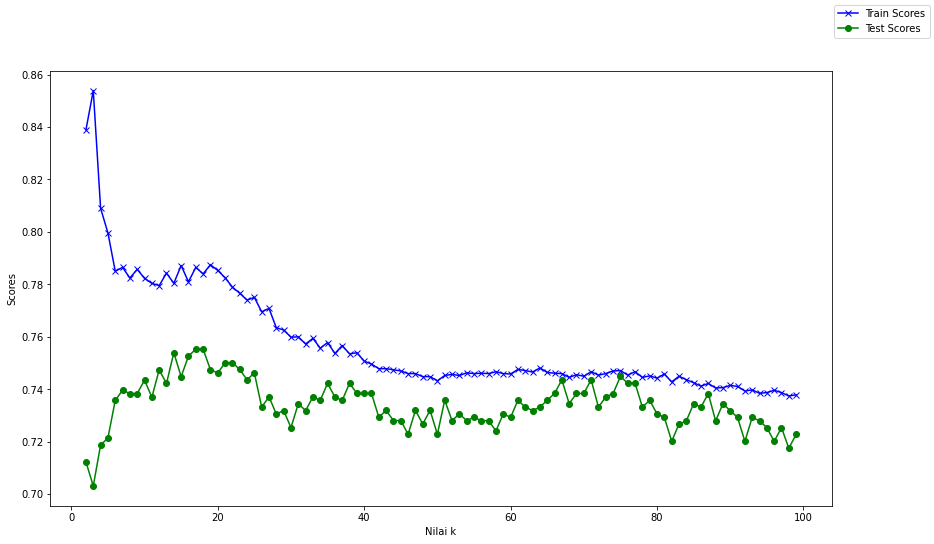

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(2, 100), train_scores, marker ='x', color='b', label='Train Scores')
ax.plot(range(2, 100), test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai k')
ax.set_ylabel('Scores')

fig.legend()
plt.show()

untuk mencari nilai k yg tepat kita mencari nilai score training dan test yang tinggi. Dilihat pada awal kurva training tinggi namun test kecil ini disebut overfitting. sedangkan untuk bagian kurva paling akhir (paling kanan) score untuk training dan validate (test) sama2 kecil sehingga ini disebut underfitting. Maka kita pilih bagian yang paling cocok untuk k +-72.

## **Hyperparameter Tuning dengan GridSearchCV dan RandomizedSearchCV**

**Underfitting** dan **overfitting** dapat diselesaikan dengan cara mengatur hyperparameter dari model.

Cara termudah untuk melakukan tuning pada parameter adalah dengan trial dan error, namun parameter pada sebuah model cukup banyak, dan bisa angka berapa saja.

Jika harus melakukan brute force satu persatu, cukup sulit dan memakan waktu. Untungnya scikit-learn menyediakan kemudahan untuk mengotomasi proses trial error ini.

Berikut code python yang sudah dimodifikasi agar kita dapat melakukan trial and error hyperparameter pada model.

### **GridSearchCV**

Catatan

> Melakukan GridSearchCV ini akan memakan waktu dan resouce cukup besar, karena melakukan testing terhadap list parameter yang diberikan.

> Kelebihan dari GridSearchCV ini, secara otomatis akan melakukan data slicing dari training dataset kita, jadi model belum melihat real training dataset.

> Setelah selesai, parameter yang terbaik dapat kita gunakan untuk membuat model, dan melakukan training dengan training dataset.

[source documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[source](https://belajardatascience.blogspot.com/2018/05/overfitting-dan-underfitting-pada-model.html)

In [62]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_score

X = df.drop('class', axis=1)
y = df['class']

In [64]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5, 50), 'weights':['distance', 'uniform']}
gscv = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5)
gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [65]:
gscv.best_params_ # fungsi akan memilihkan yang mana terbaik

{'n_neighbors': 43, 'weights': 'distance'}

In [66]:
gscv.best_score_

0.7591630591630592

### **RandomizedSearchCV**

[source documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Mencoba semua hyper paramter yg mungkin
Akan Mencoba memilih secara random

In [67]:
rscv = RandomizedSearchCV(model, param_grid, n_iter=20, scoring='accuracy', cv=5)
rscv.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'weights': ['distance', 'uniform']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy

In [68]:
rscv.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [69]:
rscv.best_score_

0.7552584670231729

[Evaluasi Model Cross Validation](https://prasetiautamacv.wordpress.com/2018/07/16/bagaimana-mengevaluasi-algoritma-machine-learning/)

[link text](https://)

[link text](https://)

[link text](https://)

In [70]:
# import panda as pd
# import numpy
# from sklearn.model_selection import train_test_split
# from sklearn import ensemble

# df = pd.read_csv("nama_file_data_set.csv")

# del df["no_rumah"]
# del df["nama_jalan"]
# del df["kodepos"]

# features_df = pd.get_dummies(df, columns=['tipe_garasi', 'kota'])

# del features_df['harga_jual']

# X = features_df.as_matrix()
# y = df['harga_jual'].as_matrix()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# model = ensemble.GradientBoostingRegressor()

# param_grid{
#     n_estimators: [500, 1000, 3000],
#     learning_rate= [0.1, 0.05, 0.02, 0.01],
#     max_depth: [4, 6],
#     min_sample_leaf: [3, 5, 7, 9, 11],
#     max_features: [1.0, 0.3, 0.1],
#     loss: ['ls',  'lad', 'hubber']
# }

# gs_cv = GridSearchCV(model, param_grid, n_jobs=4)
# gs_cv.fit(X_train, y_train)

# print(gs_cv.best_params_)

# mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
# print("Training Set Mean Absolute Error: %.4f" % mse)

# mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
# print("Test Set Mean Absolute Error: %.4f" % mse)

In [71]:
# https://www.codepolitan.com/menggunakan-gridsearchcv-untuk-mencari-parameter-optimal-pengklasifikasi-scikit-learn
# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV

# import json
# import datetime

# # menyiapkan dataset
# dataset_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

# # mengatur classifier
# clf = Pipeline([
#         ('vect', CountVectorizer()),
#         ('tfidf', TfidfTransformer()),
#         ('clf', SGDClassifier())
#     ])

# params = {
#     'vect__max_df': (0.75, 1.0),
#     #'vect__max_features': (None, 5000, 10000, 50000),
#     # 'vect__ngram_range': ((1, 1), (1, 2)),
#     #'tfidf__use_idf': (True, False),
#     'tfidf__norm': ('l1', 'l2'),
#     'clf__alpha': (0.00001, 0.000001),
#     # 'clf__penalty': ('l2', 'elasticnet'),
#     #'clf__n_iter': (10, 50, 80),
# }

# grid = GridSearchCV(
#     clf,
#     params,
#     n_jobs=4,
#     cv=10,
#     verbose=4,
# )

# clf = grid.fit(dataset_train.data, dataset_train.target)

# print("\nBest estmat"or:)
# print()
# print() clf.best_estimator_

# print() "\nGrid score:"
# print()
# for params, mean_score, scores in clf.grid_scores_:
#     print() "%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() / 2, params)
# print()

# **Contoh Lengkap**

[source](https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55)

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
breast_cancer = load_breast_cancer()
breast_cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [73]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [75]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') # metric cara menghitung jaraknya
knn.fit(X_train, y_train.values.ravel())
# DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
# when using knn.fit(X_train, y_train) so we must change the conversion

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_pred = knn.predict(X_test)

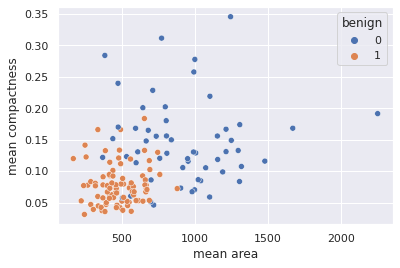

In [77]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

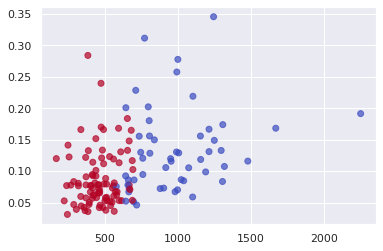

In [78]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

Given our confusion matrix, our model has an accuracy of 121/143 = 84.6%.

In [79]:
confusion_matrix(y_test, y_pred)

array([[42, 13],
       [ 9, 79]])

In [80]:
a = confusion_matrix(y_test, y_pred)
print(a)

[[42 13]
 [ 9 79]]


Membuat perbandingan plot Accuracy dan Error untuk Hyperparameter Tuning manual:

In [81]:
acc = (a[0][0]+a[1][1])* 100/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
err = (a[0][1]+a[1][0])* 100/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
prec = a[0][0]*100/(a[0][0]+a[1][0])
print('Akurasi: %.2f persen'%(acc))
print('Error: %.2f persen'%(err))
print('Presisi: %.2f persen'%(prec))

Akurasi: 84.62 persen
Error: 15.38 persen
Presisi: 82.35 persen


In [82]:
acc = []
err = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.values.ravel())
  pred_i = knn.predict(X_test)
  a = confusion_matrix(y_test, pred_i)
  ac = (a[0][0]+a[1][1])* 100/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
  er = (a[0][1]+a[1][0])* 100/(a[0][0]+a[0][1]+a[1][0]+a[1][1])
  acc.append(ac)
  err.append(er)

Text(0, 0.5, 'Accuracy')

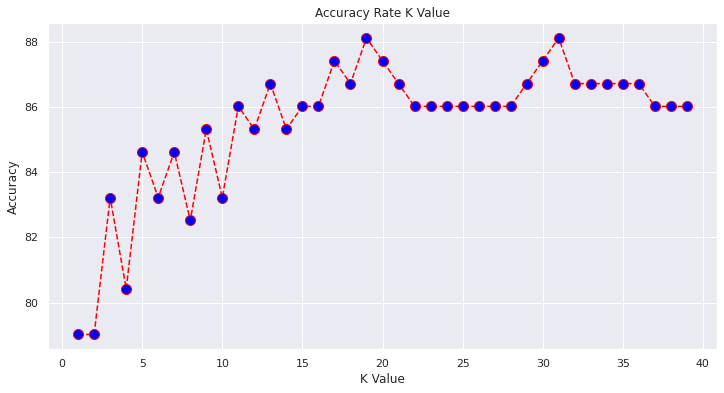

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), acc, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

k yang paling accuracy tertinggi berdasarkan Accuracy berjumlah 18 dan 32

Text(0, 0.5, 'Error')

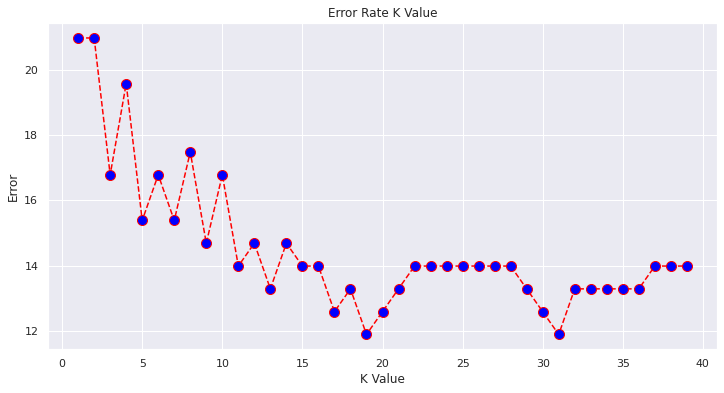

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), err, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

Kebalikan Accuracy, k yang paling sedikit error berdasarkan Error berjumlah 18 dan 32, sama seperti pada Accuracy.

Apakah model yang kita pakai adalah yang terbaik ? :

In [85]:
from sklearn.model_selection import cross_validate, cross_val_score

cv_score1 = cross_validate(knn, X_train, y_train.values.ravel(), cv=10, return_train_score=True)
cv_score2 = cross_val_score(knn, X_train, y_train.values.ravel(), cv=10)
cv_score1 # cross validate lebih lengkap

{'fit_time': array([0.00260186, 0.00157261, 0.00159359, 0.00165677, 0.00162935,
        0.0017066 , 0.00155401, 0.00156069, 0.00154853, 0.00160408]),
 'score_time': array([0.00513649, 0.00288081, 0.0043962 , 0.00296116, 0.00304556,
        0.0030086 , 0.00286388, 0.00285769, 0.00281835, 0.00283027]),
 'test_score': array([0.93023256, 0.88372093, 0.86046512, 0.93023256, 0.81395349,
        0.97674419, 0.92857143, 0.9047619 , 0.88095238, 0.80952381]),
 'train_score': array([0.88511749, 0.89295039, 0.89033943, 0.88772846, 0.89817232,
        0.88772846, 0.89583333, 0.890625  , 0.90104167, 0.90104167])}

In [86]:
cv_score2

array([0.93023256, 0.88372093, 0.86046512, 0.93023256, 0.81395349,
       0.97674419, 0.92857143, 0.9047619 , 0.88095238, 0.80952381])

In [87]:
def knn_predict(k):
  model = KNeighborsClassifier(n_neighbors=k)
  score = cross_validate(model, X_train, y_train.values.ravel(), cv=10, return_train_score=True)
  train_score = score['train_score'].mean()
  test_score = score['test_score'].mean()
  return train_score, test_score

train_scores = []
test_scores = []

for k in range (2, 100):
  train_score, test_score = knn_predict(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

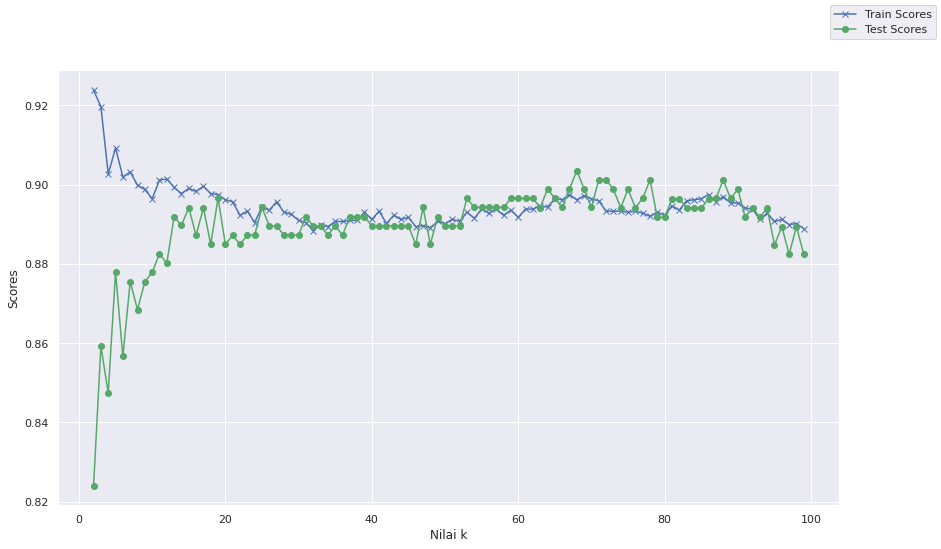

In [88]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(2, 100), train_scores, marker ='x', color='b', label='Train Scores')
ax.plot(range(2, 100), test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai k')
ax.set_ylabel('Scores')

fig.legend()
plt.show()

Insight :

Pada nilai k 0-10 -> Error yang terjadi adalah overfitting. 

Ketika kita ingin mencari fitting data dengan accuracy yang bagus pda model, namun terlalu banyak hyperparameter yang dibutuhkan. sehingga metode Tuning Hyperparameter Manual susah untuk dilakukan. Oleh karena itu ada GridSearchCV dan RandomizedSearchCV.

Dengan GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
model = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(5, 100), 'weights':['distance', 'uniform'], 'metric':['euclidean', 'manhattan']}
gscv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

gscv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['distance',

In [90]:
gscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [91]:
gscv.best_params_

{'metric': 'euclidean', 'n_neighbors': 33, 'weights': 'uniform'}

In [92]:
gscv.best_score_

0.8990424076607386

Dengan RandomizedSeacrhCV

In [93]:
rscv=RandomizedSearchCV(model, param_grid, scoring='accuracy', cv=5, n_iter=10)
rscv.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 

In [94]:
rscv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=64, p=2,
                     weights='uniform')

In [95]:
rscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 64, 'weights': 'uniform'}

In [96]:
rscv.best_score_

0.8896853625170997

**ROC dan AUC**

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, y_pred)

0.8306818181818182

In [98]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

Text(0, 0.5, 'TPR')

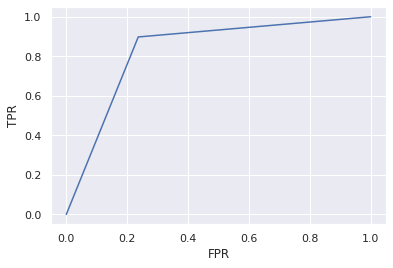

In [99]:
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

In [100]:
roc_auc_score?

multi_class='raise'

multi_class : {'raise', 'ovr', 'ovo'}, default='raise'

    Multiclass only. Determines the type of configuration to use. The default value raises an error, so either `ovr` or `ovo` must be passed explicitly.

# **Task**

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?

    Data latih : data yang digunakan sebagai referensi algoritma, data berlabel

    Data Validasi : Data yang digunakan untuk menentukan nilai hyperparameter yang optimal

    Data Test : Data yang digunakan untuk mengetahui performance model

    Data Validasi = bisa disamakan dengan Data Test

2. Bagaimana cara kita menilai performa suatu model?

    Menilai performance suatu model dapat dilakukan dengan cross validation dan confusion matriks. Selain itu juga dapat dilihat dari tingkat akurasi model


3. Apa itu Confusion Matrix? Jelaskan secara lengkap!

    Confusing Matriks => matriks yang menunjukkan jumlah data hasil prediksi yang dikategorikan masing - masing TP, TN, FP, FN

4. Apa itu Classification Report dari sklearn?

    Classification Report => Laporan kualitas performa hasil prediksi suatu algoritma klasifikasi

<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [101]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [102]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [103]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [104]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 
X = df[df.columns.drop('survival_status')]
y = df['survival_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
# 2.
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cv_score=cross_val_score(model, X_train, y_train.values.ravel(), cv=5, scoring='roc_auc')
roc_auc = roc_auc_score(y_test, y_pred)
print('CV Score : {}'.format(cv_score))
print('ROC AUC Score : {}'.format(roc_auc))

CV Score : [0.41053922 0.57230392 0.53030303 0.72027972 0.66540404]
ROC AUC Score : 0.6238656987295825


In [106]:
# 3.
print('CV Score Mean : {}'.format(cv_score.mean()))

CV Score Mean : 0.5797659856483387


In [107]:
cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

{'fit_time': array([0.00306964, 0.00164676, 0.00155163, 0.00151467, 0.00156903,
        0.00157547, 0.00152397, 0.00157356, 0.00161934, 0.00164461]),
 'score_time': array([0.00401068, 0.00214458, 0.0021379 , 0.0021565 , 0.0021708 ,
        0.00223756, 0.00216246, 0.00235939, 0.00219131, 0.00220346]),
 'test_score': array([0.60869565, 0.60869565, 0.60869565, 0.65217391, 0.73913043,
        0.65217391, 0.82608696, 0.91304348, 0.73913043, 0.5       ]),
 'train_score': array([0.80097087, 0.80582524, 0.81553398, 0.77184466, 0.79126214,
        0.7961165 , 0.7815534 , 0.76213592, 0.79126214, 0.79227053])}

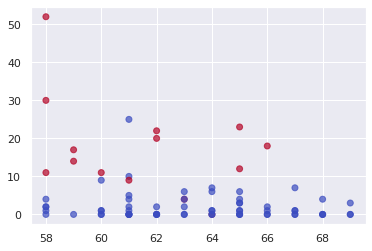

In [108]:
# 4.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(
    X_test["Patient's Years"],
    X_test["N_positive_ax"],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)


In [109]:
# 5.
a = confusion_matrix(y_test, y_pred)
print(a)

[[51  7]
 [12  7]]


In [110]:
# 6.
clas = classification_report(y_test, y_pred, target_names=['>5 Tahun', '<=5 Tahun'])
print(clas)

              precision    recall  f1-score   support

    >5 Tahun       0.81      0.88      0.84        58
   <=5 Tahun       0.50      0.37      0.42        19

    accuracy                           0.75        77
   macro avg       0.65      0.62      0.63        77
weighted avg       0.73      0.75      0.74        77



<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?

    Bias adalah seberapa jauh nilai yang diprediksi dari nilai aktual. Jika nilai prediksi rata - rata jauh dari nilai aktual maka biasnya tinggi .

    Variance adalah variabel dari prediksi model untuk data tertentu dimana memberikan kita informasi perserbaran data kita. Model yang memiliki variance tinggi sangat memperhatikan hanya pada train data. High variance model, perform baik di train data. Tetapi jika disuguhkan data baru yang belum pernah ditemukan di train data. Model tersebut tidak dapat mengeneralisasikan secara baik dari identifikasi data baru tersebut. Alhasil model memprediksi dengan keliru.

2. Apa itu Overfitting dan Underfitting?

    Overfitting = Suatu keadaan dimana suatu data terlalu belajar terhadap data training terlalu menangkan detail dan noise pada di data training, karena data training hanya data sample. Sehingga kemampuan Generalisasi berkurang. score training bagus, score validation tidak bagus.

    Underfitting = suatu keadaan dimana model tidak bagus ketika belajar pada data training (fitting). score training dan validation tidak bagus.

3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?

    Mengatur Hyperparameternya (Tuning Hyperparameter). 

4. Bagaimana model yang baik?

    Model yang goog fitting, tidak underfitting dan overfitting. bias dan variance berada pada terming point, complexitas modelnya menyebabkan nilai bias dan variance sama kecil atau tidak beda jauh.

    Score Train dan Score Validationnya (Test) besar dan tidak beda jauh.

5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

    Ketika kita masih belum yakin dan juga hyperparameter yang sangat komplex

<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik, overtting, atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [111]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [112]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [113]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [114]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import numpy as np
import matplotlib.pyplot as plt

# 1. 
X = df[df.columns.drop('survival_status')]
y = df['survival_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [115]:
# 2.
model = KNeighborsClassifier(n_neighbors=5)
# 3. 4. 5.
param_grid = {'n_neighbors':np.arange(5, 100), 'weights':['distance', 'uniform'], 'metric':['euclidean', 'manhattan']}
gscv = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)

In [116]:
# 6.
gscv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['distance',

In [117]:
print(gscv.best_params_) # 7.
print(gscv.best_score_) # 8.

{'metric': 'manhattan', 'n_neighbors': 96, 'weights': 'uniform'}
0.6520739064856711


In [118]:
model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_pred= y_pred[:, np.newaxis]
# 9.
y_predict=gscv.predict_proba(X_test)  #nomor 9
y_predict

array([[0.80208333, 0.19791667],
       [0.76041667, 0.23958333],
       [0.78125   , 0.21875   ],
       [0.77083333, 0.22916667],
       [0.76041667, 0.23958333],
       [0.65625   , 0.34375   ],
       [0.78125   , 0.21875   ],
       [0.79166667, 0.20833333],
       [0.80208333, 0.19791667],
       [0.80208333, 0.19791667],
       [0.76041667, 0.23958333],
       [0.60416667, 0.39583333],
       [0.78125   , 0.21875   ],
       [0.75      , 0.25      ],
       [0.80208333, 0.19791667],
       [0.61458333, 0.38541667],
       [0.76041667, 0.23958333],
       [0.67708333, 0.32291667],
       [0.61458333, 0.38541667],
       [0.79166667, 0.20833333],
       [0.78125   , 0.21875   ],
       [0.71875   , 0.28125   ],
       [0.80208333, 0.19791667],
       [0.71875   , 0.28125   ],
       [0.77083333, 0.22916667],
       [0.80208333, 0.19791667],
       [0.78125   , 0.21875   ],
       [0.8125    , 0.1875    ],
       [0.80208333, 0.19791667],
       [0.75      , 0.25      ],
       [0.

In [119]:
gscv.classes_

array([1, 2])

In [120]:
df2=pd.DataFrame(y_predict,columns=['class_1','class_2',]) #nomor 10
df2['class_2']

0     0.197917
1     0.239583
2     0.218750
3     0.229167
4     0.239583
        ...   
72    0.229167
73    0.197917
74    0.291667
75    0.208333
76    0.218750
Name: class_2, Length: 77, dtype: float64

In [121]:
ypredict_class=y_predict.argmax(axis=-1)
df_predict=pd.DataFrame(ypredict_class+1)

In [122]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test, df_predict) #nomor 11

0.5

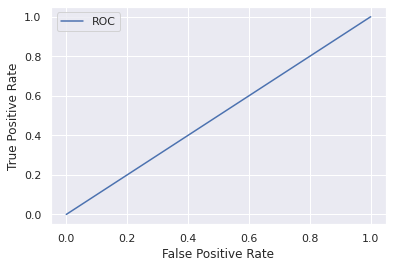

In [123]:
roc_curve(y_test, df_predict,pos_label=1)

import matplotlib.pyplot as plt
a, b, _ = roc_curve(y_test, df_predict,pos_label=1)
plt.plot(a, b, label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

berdasarkan nilai roc auc score didapatkan sebesar 0.6 sehingga termasuk ke dalam model underfitting

In [124]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier() #nomor 2
param_rcv={'max_depth':np.arange(2,100)}
rcv=RandomizedSearchCV(dtc,param_distributions=param_rcv,scoring='roc_auc',cv=5,return_train_score=True)
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [125]:
rcv.best_params_,rcv.best_score_

({'max_depth': 92}, 0.5505381873028933)

In [126]:
if gscv.best_score_ > rcv.best_score_:
    print ("Algoritma kkn terbaik")
else :
    print("Algoritma decision-tree terbaik")

Algoritma kkn terbaik
